In [1]:
# import triangle
# import HalfMegaModel as hmm
from triangle import Triangle
from HalfMegaModel import HalfMegaModel, MegaData
import pymc
import arviz as az

from importlib import reload

import pandas as pd

In [2]:
rpt, paid = Triangle.from_dahms()

   ay          1          2          3          4          5          6   
0   1  1216632.0  1347072.0  1786877.0  2281606.0  2656224.0  2909307.0  \
1   2   798924.0  1051912.0  1215785.0  1349939.0  1655312.0  1926210.0   
2   3  1115636.0  1387387.0  1930867.0  2177002.0  2513171.0  2931930.0   
3   4  1052161.0  1321206.0  1700132.0  1971303.0  2298349.0  2645113.0   
4   5   808864.0  1029523.0  1229626.0  1590338.0  1842662.0  2150351.0   
5   6  1016862.0  1251420.0  1698052.0  2105143.0  2385339.0        NaN   
6   7   948312.0  1108791.0  1315524.0  1487577.0        NaN        NaN   
7   8   917530.0  1082426.0  1484405.0        NaN        NaN        NaN   
8   9  1001238.0  1376124.0        NaN        NaN        NaN        NaN   
9  10   841930.0        NaN        NaN        NaN        NaN        NaN   

           7          8          9         10  
0  3283388.0  3587549.0  3754403.0  3921258.0  
1  2132833.0  2287311.0  2567056.0        NaN  
2  3047368.0  3182511.0       

In [3]:
md = MegaData(rpt, paid)

In [4]:
mm = HalfMegaModel(md)

In [5]:
mm.loss_ult_prior

array([3921258.        , 2905039.5922125 , 3214395.28008902,
       3334861.30300369, 3168700.5507803 , 3489267.29150883,
       3356240.60084877, 3482055.85526332, 2794902.56243951,
       3398542.24406492])

In [6]:
mm.prior_ultimate_distributions().eval()

array([2985672.16874935, 3397496.32251748, 3621734.67236788,
       3505423.09679199, 3310313.45593129, 2906874.73848101,
       3464609.90972231, 2988794.35142545, 3140190.53971536,
       3574998.73448663])

In [7]:
b0 = mm.prior_development_distributions()
b0[0].eval()

array([ 0.03200525,  3.51324869,  0.64739834, -4.31961205, -2.97705562,
        5.47282595, -0.24991355,  2.18699273, -5.60757012,  0.28516352])

In [8]:
b0[1].eval()

array([-6.15594863, -1.54772656,  6.6064354 , -2.14316456, -3.41729797,
       -3.49113554,  4.60873771, -9.93440503, -7.05817377,  1.17242663])

In [9]:
s0 = mm.prior_sigma_distributions()
s0[0].eval()


array([  6.61135862,  15.64485345,   1.61916756,   0.56388491,
         7.19839808,   0.61353393, 149.38588866,   0.76215869,
         3.32198779,   7.98819715])

In [10]:
s0[1].eval()

array([ 3.14779209,  3.62778679, 12.18773012,  0.21420525,  3.63991098,
        0.12721786,  4.32227871,  3.33149653, 16.73051186,  0.98368612])

In [11]:
mm.chain_ladder_model()

 latent-ult-loss ~ LogNormal(15, 0.0912)
   beta-rpt-loss ~ Normal(0, 5)
  beta-paid-loss ~ Normal(0, 5)
  sigma-rpt-loss ~ HalfCauchy(0, 2.5)
 sigma-paid-loss ~ HalfCauchy(0, 2.5)
      alpha-loss ~ Deterministic(f(latent-ult-loss))
 loglik-rpt-loss ~ Normal(<constant>, <constant>)
loglik-paid-loss ~ Normal(<constant>, <constant>)

In [16]:
pymc.sample?

Signature:
pymc.sample(
    draws: int = 1000,
    *,
    tune: int = 1000,
    chains: Optional[int] = None,
    cores: Optional[int] = None,
    random_seed: Union[int, Sequence[int], numpy.ndarray, NoneType, numpy.random.mtrand.RandomState, numpy.random._generator.Generator] = None,
    progressbar: bool = True,
    step=None,
    nuts_sampler: str = 'pymc',
    initvals: Union[Dict[Union[pytensor.graph.basic.Variable, str], Union[numpy.ndarray, pytensor.graph.basic.Variable, str]], Sequence[Optional[Dict[Union[pytensor.graph.basic.Variable, str], Union[numpy.ndarray, pytensor.graph.basic.Variable, str]]]], NoneType] = None,
    init: str = 'auto',
    jitter_max_retries: int = 10,
    n_init: int = 200000,
    trace: Optional[pymc.backends.base.BaseTrace] = None,
    discard_tuned_samples: bool = True,
    compute_convergence_checks: bool = True,
    keep_warning_stat: bool = False,
    return_inferencedata: bool = True,
    idata_kwargs: Optional[Dict[str, Any]] = None,
    nuts_s

In [12]:
mm.fit(samples=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [latent-ult-loss, beta-rpt-loss, beta-paid-loss, sigma-rpt-loss, sigma-paid-loss]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 244 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
There were 1000 divergences after tuning. Increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'alpha-loss'}>,
        <Axes: title={'center': 'alpha-loss'}>]], dtype=object)

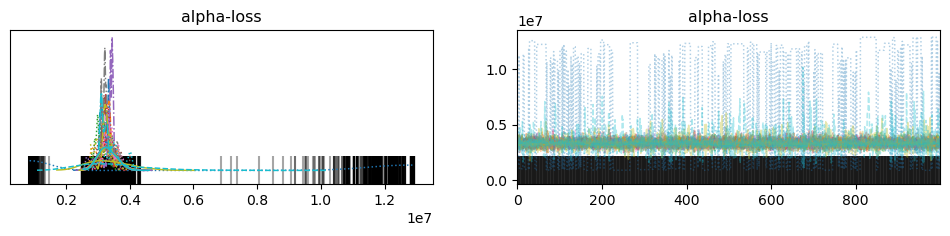

In [13]:
az.plot_trace(mm.trace, var_names=['alpha-loss'])

array([[<Axes: >, <Axes: xlabel='alpha-loss\n0, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n1, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n2, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n3, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n4, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n5, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n6, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n7, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n8, 0'>],
       [<Axes: >, <Axes: xlabel='alpha-loss\n9, 0'>]], dtype=object)

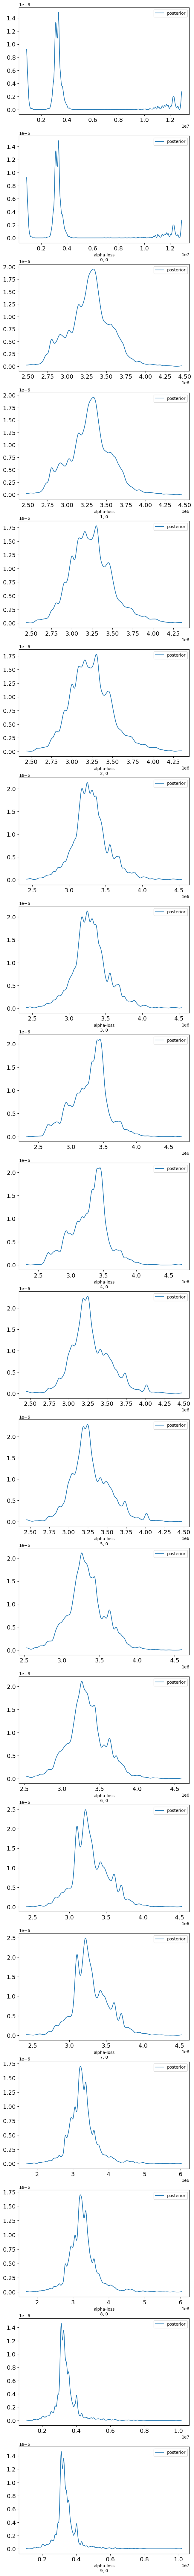

In [14]:
az.plot_dist_comparison(mm.trace, var_names=['alpha-loss'])

In [ ]:
az.plot_ppc(mm.trace, var_names=['beta-rpt_loss'])